In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/nickbelgau/STA6257_PCA/main/data/Alz_mortality_data_complete_with_state_csv.csv"
df = pd.read_csv(url) 

In [3]:
columns_to_select = [
    "obesity_age_adj", "Smoking_Rate", "Diabetes", "Heart_Disease", "Cancer",
    # "Mercury_TPY", "Lead_TPY", "Food_index", "Poverty_Percent", "Atrazine_High_KG", "SUNLIGHT"
]
# df[columns_to_select].dtypes
df = df[columns_to_select]

In [ ]:
# Create a pair plot for all numeric variables in the DataFrame
sns.pairplot(df[columns_to_select])
plt.show()

### Isolate Diabetes and obesity_age_adj

In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_harvey_collier

# Data prep
X = df[['obesity_age_adj']]
X = sm.add_constant(X)
y = df['Diabetes'] 

# Regression
model = sm.OLS(y, X).fit()
df['residuals'] = model.resid

# Harvey-Collier Test for Linearity
tr, p_value = linear_harvey_collier(model)
print("p-value for nonlinearity:", p_value)

p-value for nonlinearity: 8.537283169148e-27


In [23]:
# Smoothing
lowess_smoothed = sm.nonparametric.lowess(df['residuals'], df['obesity_age_adj'], frac=0.3)
lowess_df = pd.DataFrame(lowess_smoothed, columns=['obesity_age_adj', 'smoothed_residuals'])
smoothed_resid_map = dict(zip(lowess_df['obesity_age_adj'], lowess_df['smoothed_residuals']))
df['smoothed_residuals'] = df['obesity_age_adj'].map(smoothed_resid_map).interpolate()

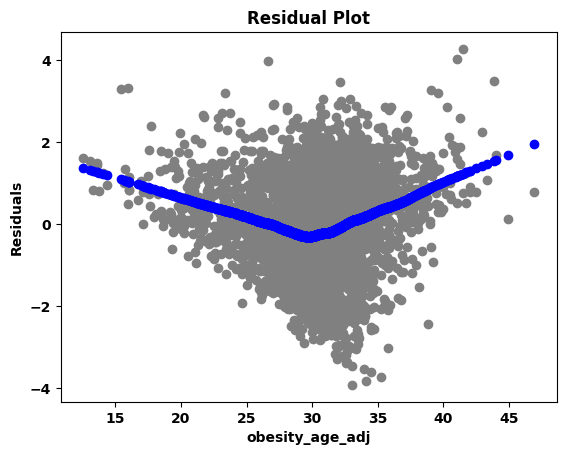

In [24]:
import matplotlib.pyplot as plt

# plt.scatter(df['obesity_age_adj'], df['residuals'], alpha=0.5)
plt.scatter(df['obesity_age_adj'], df['residuals'], color='grey')
plt.scatter(df['obesity_age_adj'], df['smoothed_residuals'], color='blue')

plt.title('Residual Plot')
plt.xlabel('obesity_age_adj')
plt.ylabel('Residuals')
plt.show()


### Loop thru each

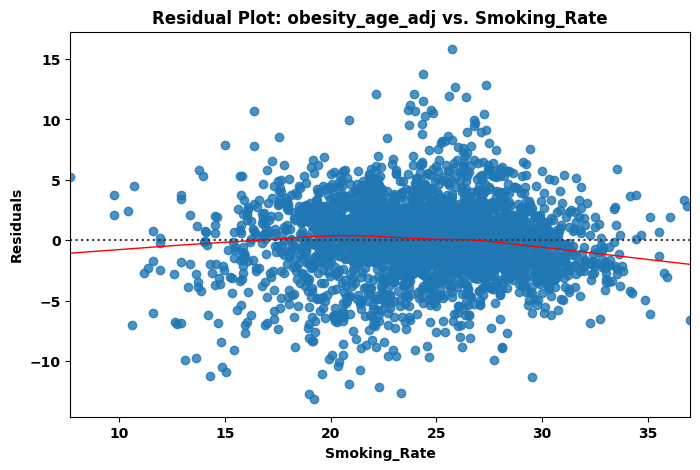

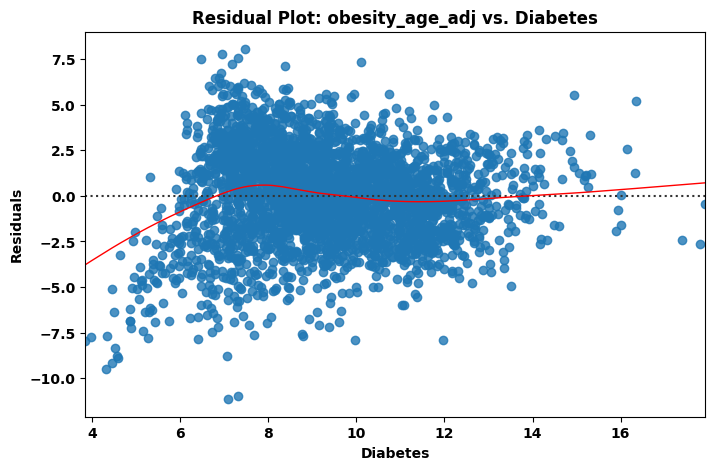

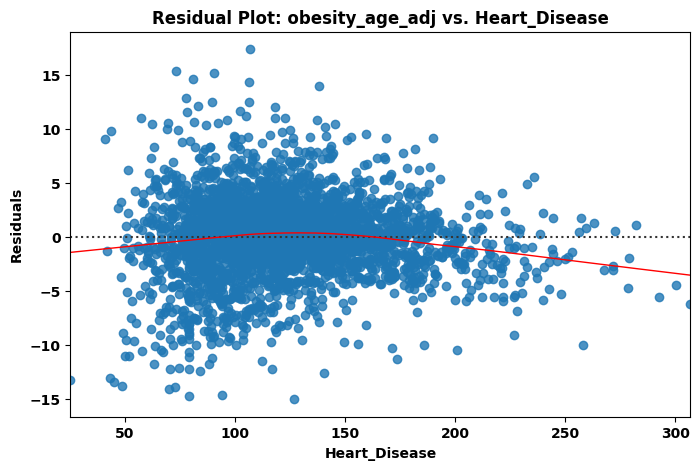

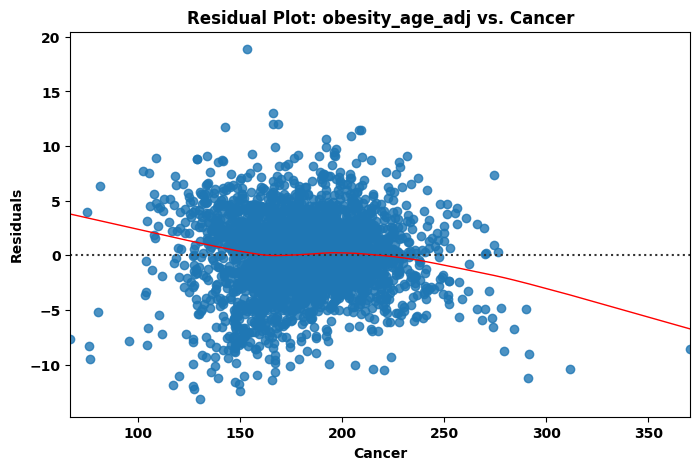

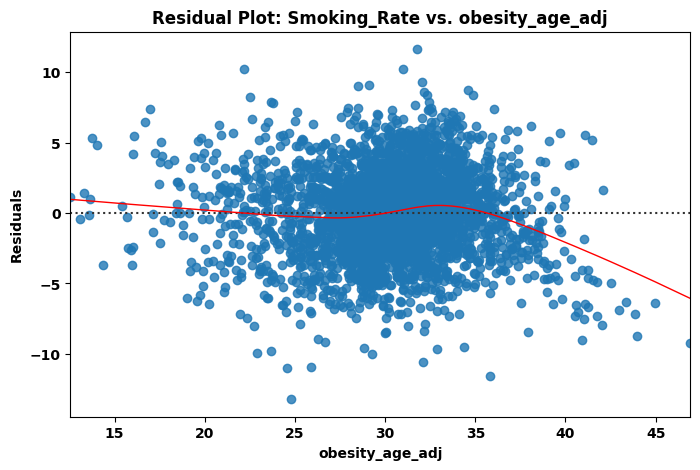

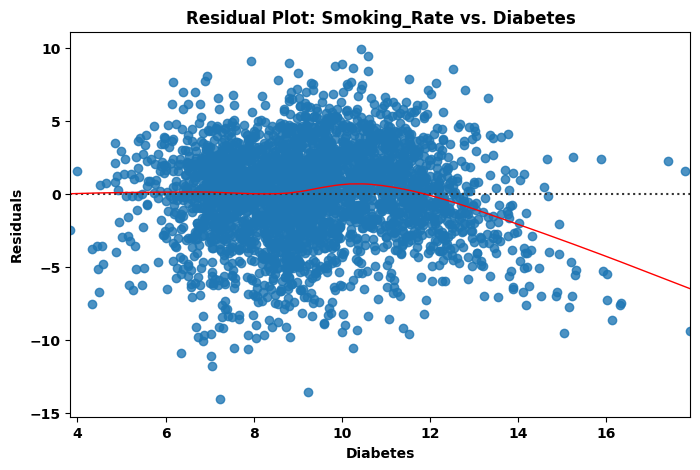

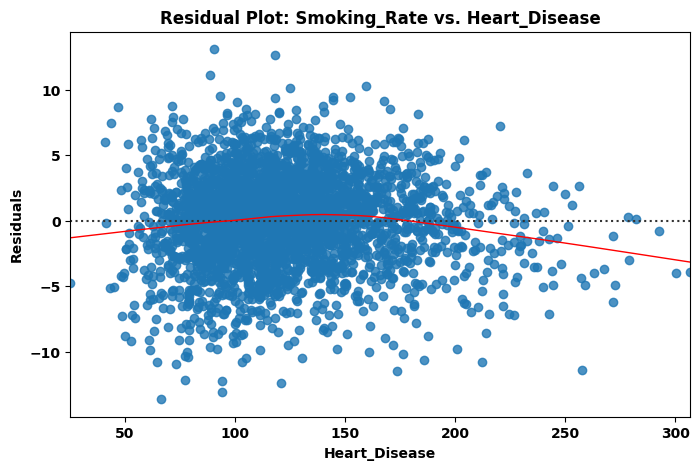

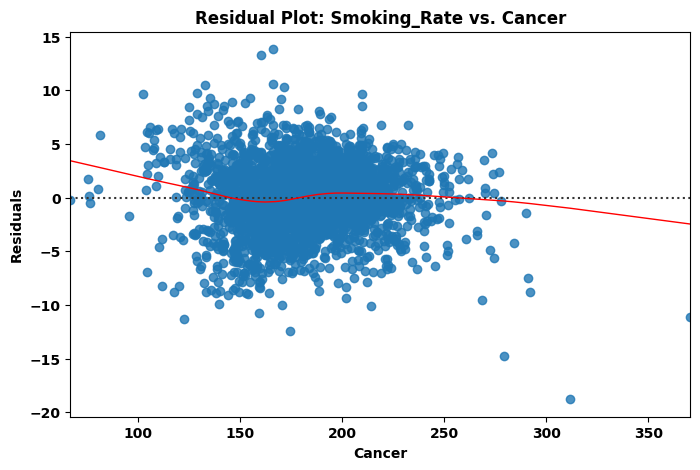

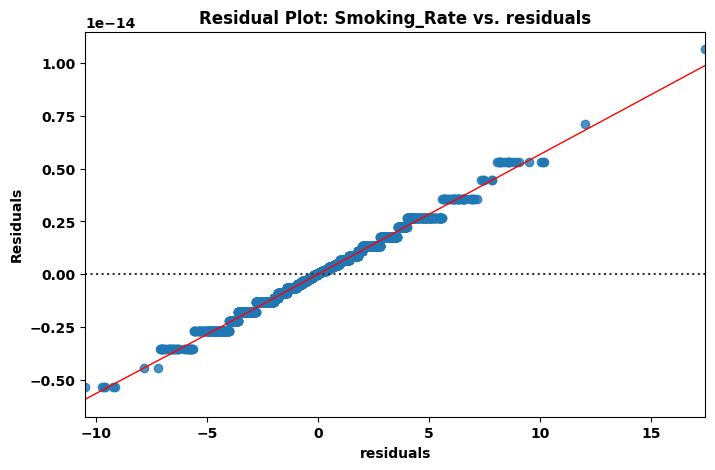

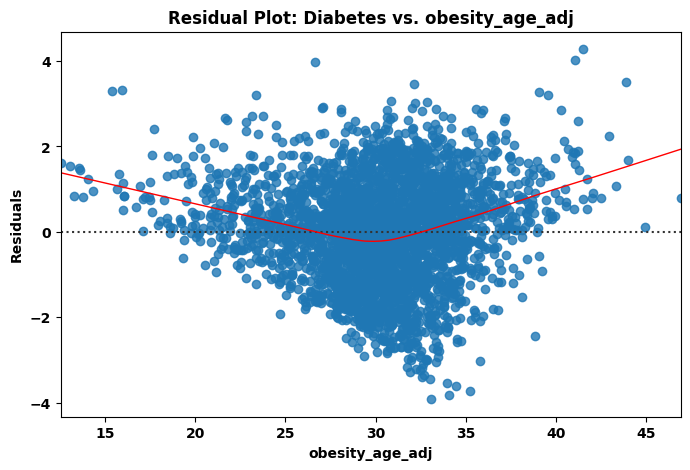

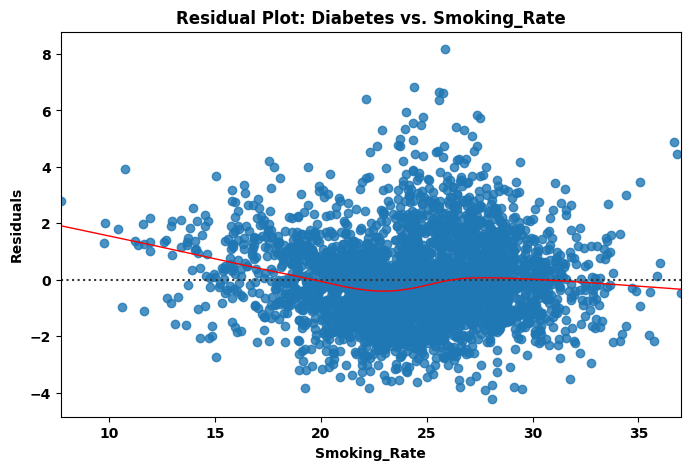

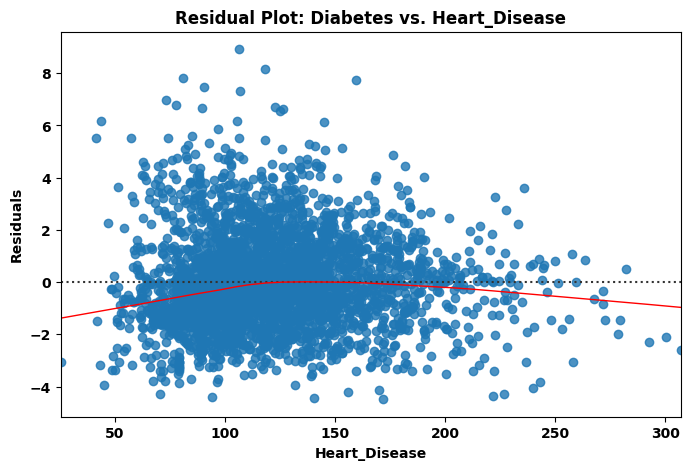

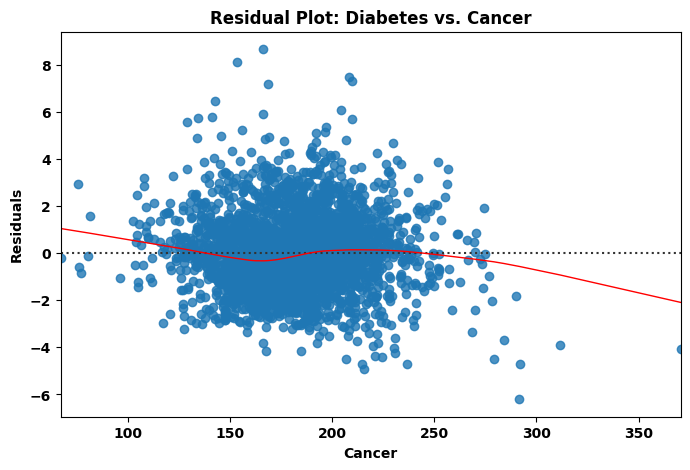

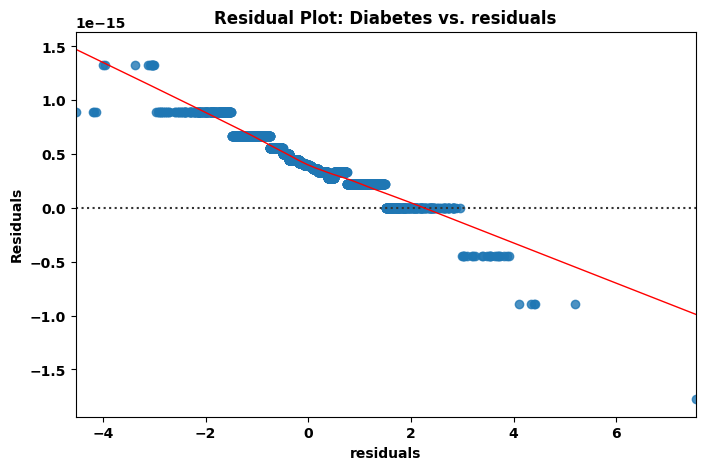

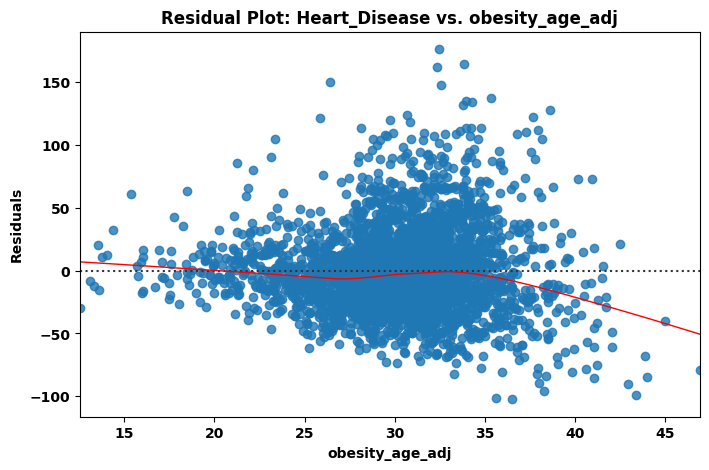

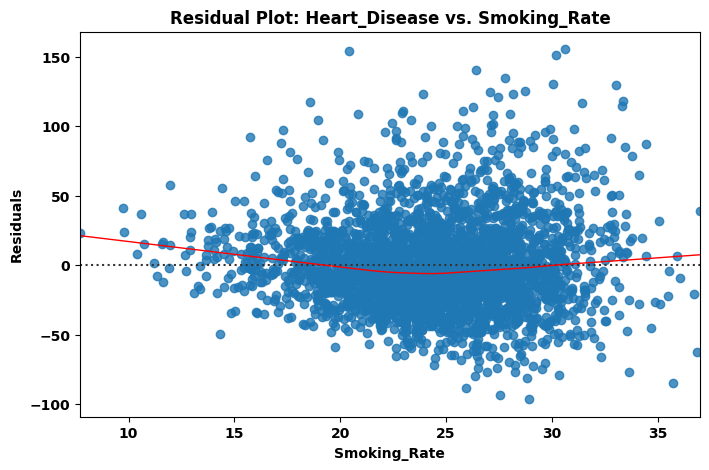

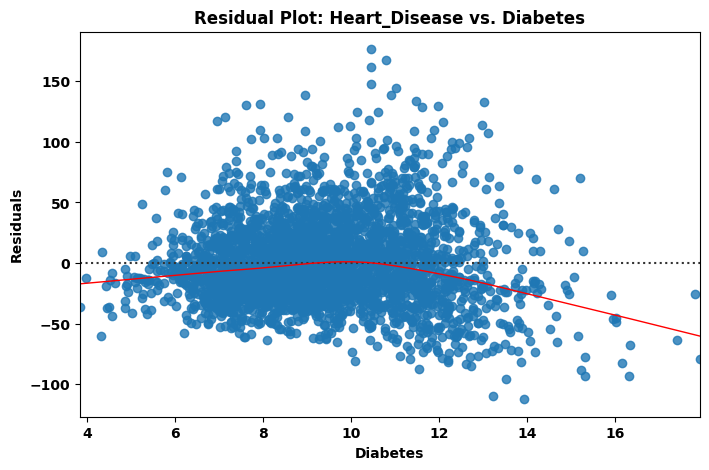

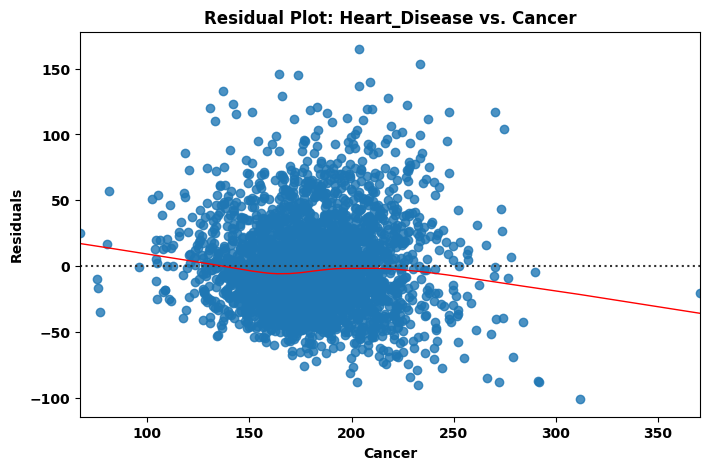

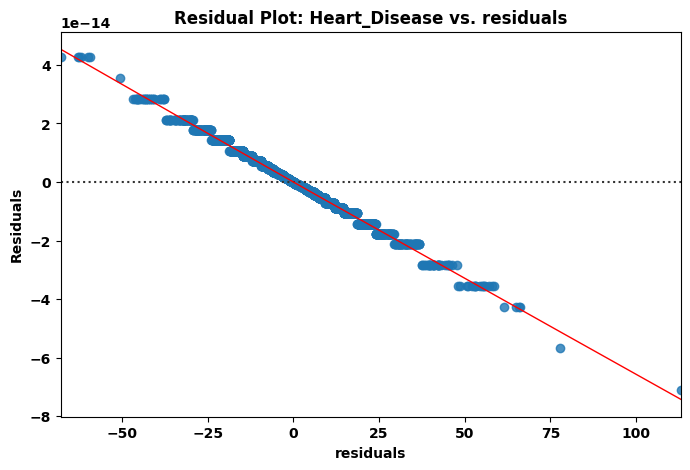

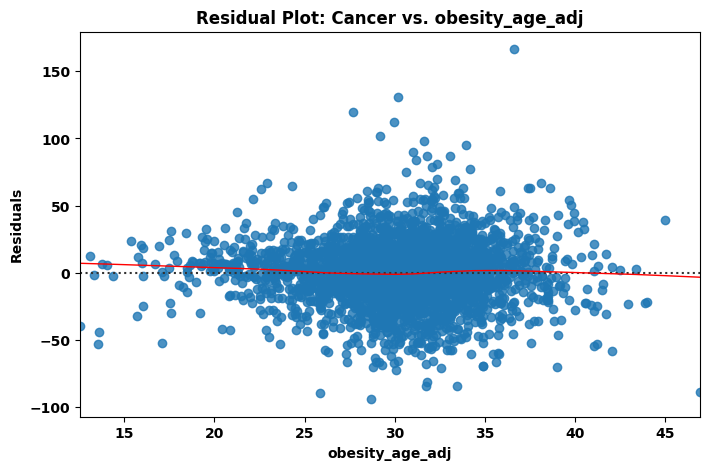

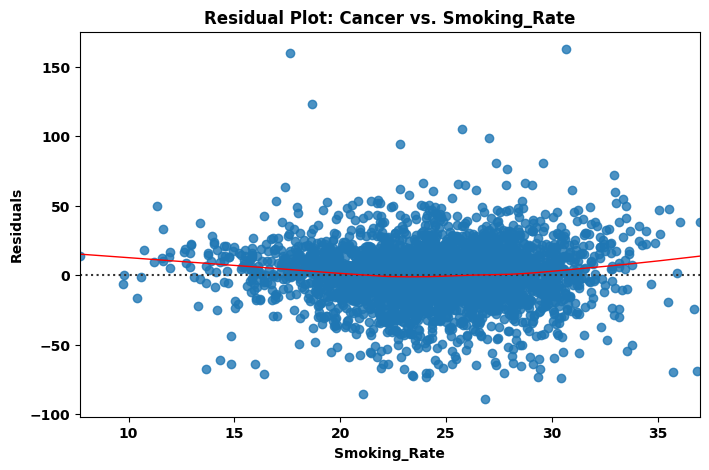

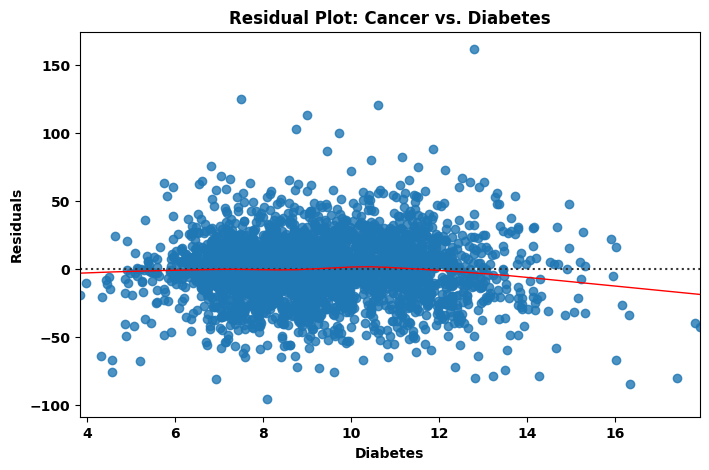

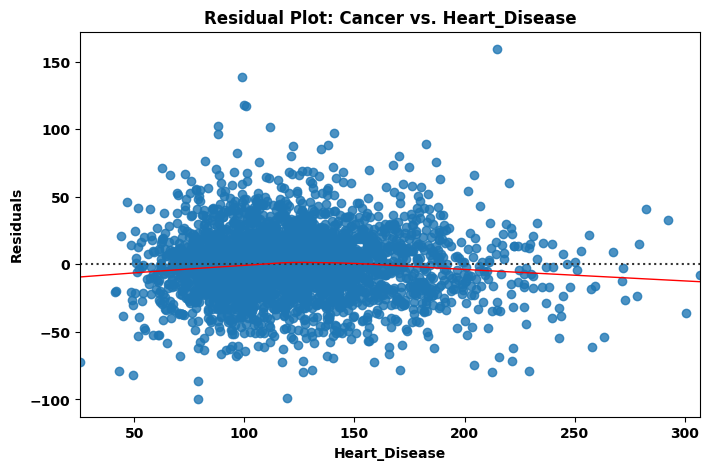

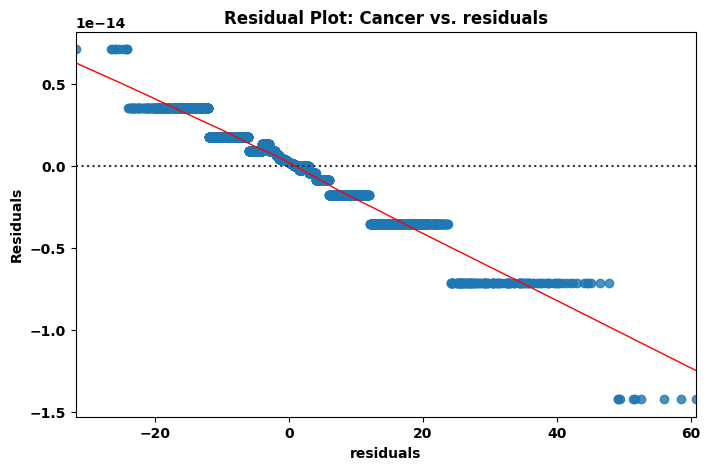

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Loop through all pairs of columns
for dependent_var in df.columns:
    for independent_var in df.columns:
        if dependent_var != independent_var:
            # Fit a linear regression model
            X = df[[independent_var]]  # Predictor
            X = sm.add_constant(X)  # Adds a constant term to the predictor
            y = df[dependent_var]  # Response

            model = sm.OLS(y, X).fit()
            df['residuals'] = model.resid

            # Plotting the residual plot
            plt.figure(figsize=(8, 5))
            sns.residplot(x=independent_var, y='residuals', data=df, lowess=True, 
                          line_kws={'color': 'red', 'lw': 1})
            plt.title(f'Residual Plot: {dependent_var} vs. {independent_var}')
            plt.xlabel(independent_var)
            plt.ylabel('Residuals')
            plt.show()
